In [1]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("GPU devices:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.17.0
GPU devices: []


In [4]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
tf.config.list_physical_devices('GPU')


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16268243722858699712
xla_global_id: -1
]


[]

In [1]:
import tensorflow as tf
print("Is TF built with CUDA support:", tf.test.is_built_with_cuda())

Is TF built with CUDA support: False


In [2]:
!pip list

Package                      Version
---------------------------- ---------
absl-py                      2.3.1
astunparse                   1.6.3
cachetools                   6.2.1
certifi                      2025.10.5
charset-normalizer           3.4.4
flatbuffers                  25.9.23
gast                         0.6.0
google-auth                  2.41.1
google-auth-oauthlib         1.2.2
google-pasta                 0.2.0
grpcio                       1.76.0
h5py                         3.15.1
idna                         3.11
keras                        3.11.3
libclang                     18.1.1
Markdown                     3.9
markdown-it-py               4.0.0
MarkupSafe                   3.0.3
mdurl                        0.1.2
ml-dtypes                    0.4.1
namex                        0.1.0
numpy                        1.26.4
oauthlib                     3.3.1
opt_einsum                   3.4.0
optree                       0.17.0
packaging                    25.0
pip  

In [122]:
import os
import tensorflow as tf

In [123]:
os.path.join('Data','happy')

'Data/happy'

In [124]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [125]:
import cv2
import imghdr

In [126]:
data_dir = 'Data'

In [127]:
image_exts = ["jpeg", "jpg", "bmp", "png"]

In [128]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [129]:
import numpy as np
from matplotlib import pyplot as plt

In [130]:
data = tf.keras.utils.image_dataset_from_directory('Data')

Found 151 files belonging to 2 classes.


In [131]:
data_iterator = data.as_numpy_iterator()

In [132]:
batch = data_iterator.next()

2025-10-23 20:19:21.945909: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


In [133]:
#Class 1 = sad people
#Class 0 = happy people
batch

(array([[[[255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          ...,
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ]],
 
         [[255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          ...,
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ]],
 
         [[255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          ...,
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ],
          [255.       , 255.       , 255.       ]],
 
         ...,
 
         [[2

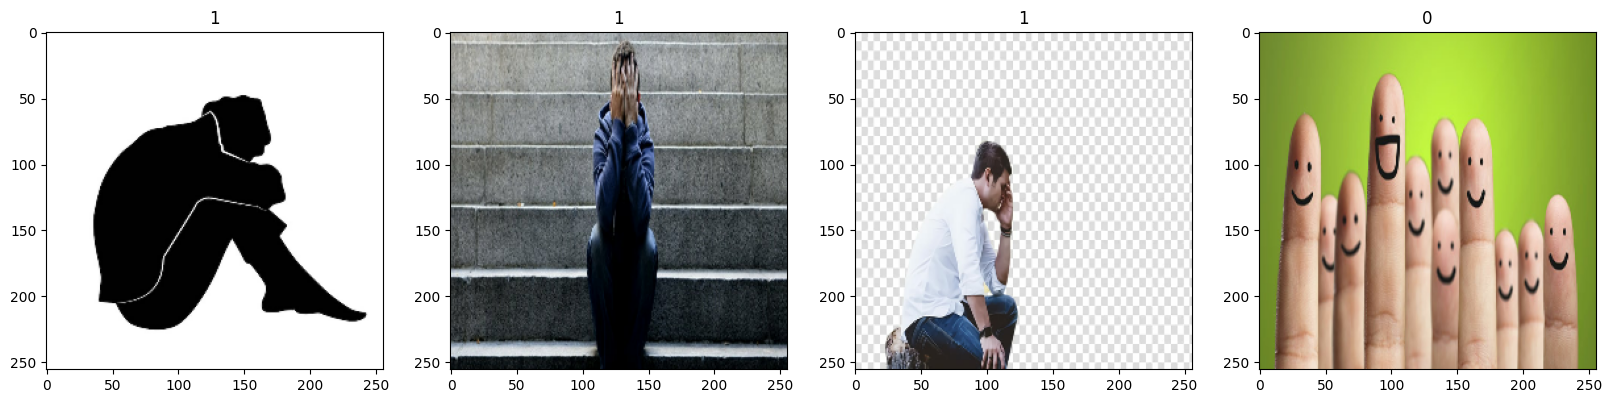

In [134]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [135]:
data = data.map(lambda x, y: (x/255, y))

In [136]:
data.as_numpy_iterator().next()

2025-10-23 20:19:31.377607: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


(array([[[[0.12981005, 0.13765319, 0.13373162],
          [0.14748774, 0.15533088, 0.15140931],
          [0.1513174 , 0.15916054, 0.15523897],
          ...,
          [0.20033701, 0.20818014, 0.20425858],
          [0.225     , 0.23284313, 0.22892156],
          [0.13526349, 0.14310662, 0.13918506]],
 
         [[0.15481006, 0.1626532 , 0.15873162],
          [0.14800858, 0.15585172, 0.15193015],
          [0.15199143, 0.15983456, 0.155913  ],
          ...,
          [0.12772672, 0.13556986, 0.13164829],
          [0.13002451, 0.13786764, 0.13394608],
          [0.15242034, 0.16026348, 0.15634191]],
 
         [[0.16822916, 0.1760723 , 0.17215073],
          [0.17349878, 0.18134192, 0.17742035],
          [0.17120098, 0.17904411, 0.17512254],
          ...,
          [0.14332108, 0.15116422, 0.14724265],
          [0.14500612, 0.15284927, 0.1489277 ],
          [0.14175858, 0.14960171, 0.14568014]],
 
         ...,
 
         [[0.1764706 , 0.18431373, 0.18039216],
          [0.17647

In [137]:
scaled_iterator = data.as_numpy_iterator()

In [138]:
batch[0].min()

0.0

In [139]:
len(data)

5

In [140]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [141]:
print(train_size)
print(val_size)
print(test_size)

3
1
1


In [142]:
train = data.take(train_size)
val = data.skip(val_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [143]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [144]:
model = Sequential()

In [145]:
MaxPooling2D??

Init signature:
MaxPooling2D(
    pool_size=(2, 2),
    strides=None,
    padding='valid',
    data_format=None,
    name=None,
    **kwargs,
)
Source:        
@keras_export(["keras.layers.MaxPooling2D", "keras.layers.MaxPool2D"])
class MaxPooling2D(BasePooling):
    """Max pooling operation for 2D spatial data.

    Downsamples the input along its spatial dimensions (height and width)
    by taking the maximum value over an input window
    (of size defined by `pool_size`) for each channel of the input.
    The window is shifted by `strides` along each dimension.

    The resulting output when using the `"valid"` padding option has a spatial
    shape (number of rows or columns) of:
    `output_shape = math.floor((input_shape - pool_size) / strides) + 1`
    (when `input_shape >= pool_size`)

    The resulting output shape when using the `"same"` padding option is:
    `output_shape = math.floor((input_shape - 1) / strides) + 1`

    Args:
        pool_size: int or tuple of 2 integers

In [146]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3))) # layer menerima gambar 256x256 dan mengekstraksi fitur dasar (garis, tepi, dll).
model.add(MaxPooling2D()) # mengurangi ukuran 256x256 -> 128x128 -> 64x64 dst.....

model.add(Conv2D(32, (3,3), 1, activation='relu')) # set filter 32 agar model belajar lebih banyak pola yang kompleks
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu')) # turun ke 16 untuk mneyeimbangkan kompleksitas dan menghindari overfitting
model.add(MaxPooling2D())

model.add(Flatten()) # merubah hasil 2d menjadi 1d (penting sebelum masuk ke dense layer)
model.add(Dense(256, activation='relu')) # model belajar menggabungkan semua fitur visual untuk membuat keputusan
model.add(Dense(1, activation='sigmoid')) # output layer menghasilkan nilai antara 0-1

In [147]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [148]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [149]:
logdir='logs'

In [150]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [151]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2025-10-23 20:19:34.946585: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5747 - loss: 1.1202

2025-10-23 20:19:36.246990: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 334ms/step - accuracy: 0.5208 - loss: 2.0211 - val_accuracy: 0.6562 - val_loss: 0.8246
Epoch 2/20


2025-10-23 20:19:36.680137: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5625 - loss: 1.0785 

2025-10-23 20:19:37.048950: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 0.5000 - loss: 1.1060 - val_accuracy: 0.5312 - val_loss: 0.7781
Epoch 3/20


2025-10-23 20:19:37.312574: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3056 - loss: 0.9822 

2025-10-23 20:19:37.681279: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 0.3854 - loss: 0.8483 - val_accuracy: 0.8438 - val_loss: 0.6553
Epoch 4/20
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.7500 - loss: 0.6612

2025-10-23 20:19:38.022294: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7135 - loss: 0.6532 

2025-10-23 20:19:38.319688: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 226ms/step - accuracy: 0.6875 - loss: 0.6459 - val_accuracy: 0.5625 - val_loss: 0.6343
Epoch 5/20
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.7500 - loss: 0.5843

2025-10-23 20:19:38.643224: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6997 - loss: 0.5918 

2025-10-23 20:19:38.890405: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - accuracy: 0.6458 - loss: 0.6027 - val_accuracy: 0.5625 - val_loss: 0.6420
Epoch 6/20
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.6562 - loss: 0.5632

2025-10-23 20:19:39.188933: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.6719 - loss: 0.5544

2025-10-23 20:19:39.470559: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 238ms/step - accuracy: 0.6562 - loss: 0.5710 - val_accuracy: 0.6875 - val_loss: 0.5871
Epoch 7/20
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.7812 - loss: 0.5739

2025-10-23 20:19:39.752991: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7882 - loss: 0.5524 

2025-10-23 20:19:40.036666: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - accuracy: 0.7708 - loss: 0.5495 - val_accuracy: 0.7812 - val_loss: 0.5255
Epoch 8/20


2025-10-23 20:19:40.272380: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8177 - loss: 0.4829 

2025-10-23 20:19:40.685538: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 218ms/step - accuracy: 0.7812 - loss: 0.5058 - val_accuracy: 0.7188 - val_loss: 0.4576
Epoch 9/20


2025-10-23 20:19:40.978274: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7708 - loss: 0.4228 

2025-10-23 20:19:41.335847: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - accuracy: 0.7812 - loss: 0.4374 - val_accuracy: 0.9375 - val_loss: 0.3542
Epoch 10/20
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.8750 - loss: 0.3813

2025-10-23 20:19:41.582021: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.8594 - loss: 0.3873

2025-10-23 20:19:41.931099: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step - accuracy: 0.8646 - loss: 0.3801 - val_accuracy: 0.8438 - val_loss: 0.3180
Epoch 11/20


2025-10-23 20:19:42.207190: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.8542 - loss: 0.3467 - val_accuracy: 0.8438 - val_loss: 0.2995
Epoch 12/20


2025-10-23 20:19:42.700975: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8715 - loss: 0.2991 

2025-10-23 20:19:42.964291: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-10-23 20:19:43.165346: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - accuracy: 0.8646 - loss: 0.2892 - val_accuracy: 0.8750 - val_loss: 0.2936
Epoch 13/20
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9375 - loss: 0.2485

2025-10-23 20:19:43.449434: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.9297 - loss: 0.2460

2025-10-23 20:19:43.749404: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 262ms/step - accuracy: 0.9271 - loss: 0.2253 - val_accuracy: 0.9062 - val_loss: 0.2254
Epoch 14/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9184 - loss: 0.2062 

2025-10-23 20:19:44.125680: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.8958 - loss: 0.2414 - val_accuracy: 0.9375 - val_loss: 0.1651
Epoch 15/20


2025-10-23 20:19:44.367977: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8976 - loss: 0.2061

2025-10-23 20:19:44.619011: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-10-23 20:19:44.776732: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.9271 - loss: 0.1685 - val_accuracy: 0.9375 - val_loss: 0.2070
Epoch 16/20


2025-10-23 20:19:45.028327: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 0.9375 - loss: 0.1585 - val_accuracy: 0.9375 - val_loss: 0.1798
Epoch 17/20


2025-10-23 20:19:45.488758: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-10-23 20:19:45.683833: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.8906 - loss: 0.2105

2025-10-23 20:19:45.972139: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 225ms/step - accuracy: 0.9271 - loss: 0.1771 - val_accuracy: 0.9062 - val_loss: 0.1594
Epoch 18/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9375 - loss: 0.1648

2025-10-23 20:19:46.288618: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-10-23 20:19:46.509977: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 242ms/step - accuracy: 0.9375 - loss: 0.1711 - val_accuracy: 0.9688 - val_loss: 0.1304
Epoch 19/20


2025-10-23 20:19:46.805553: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.9583 - loss: 0.1367 - val_accuracy: 0.9688 - val_loss: 0.0909
Epoch 20/20
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.9688 - loss: 0.1048

2025-10-23 20:19:47.384360: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step - accuracy: 0.9792 - loss: 0.1306 - val_accuracy: 0.9375 - val_loss: 0.3121


2025-10-23 20:19:47.656077: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


<function matplotlib.pyplot.show(close=None, block=None)>

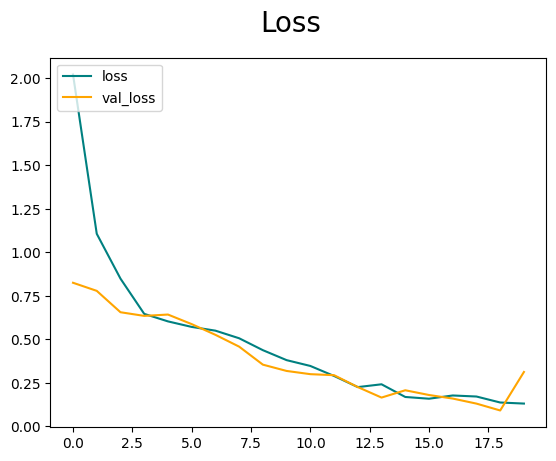

In [152]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

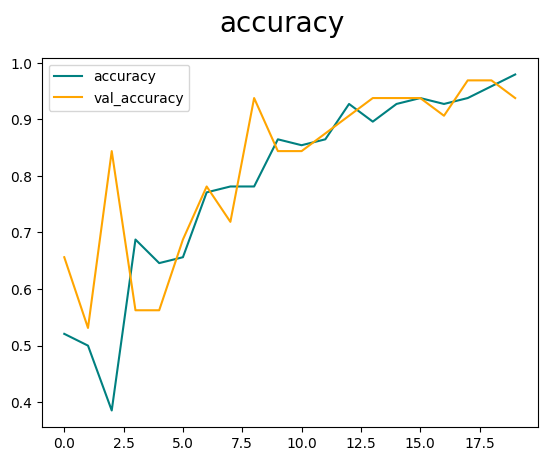

In [153]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show

In [154]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [155]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [156]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2025-10-23 20:19:48.271256: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


2025-10-23 20:19:48.716064: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [157]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


<function matplotlib.pyplot.show(close=None, block=None)>

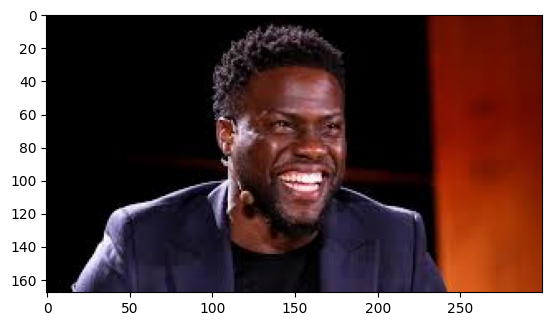

In [158]:
img = cv2.imread('kevin.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

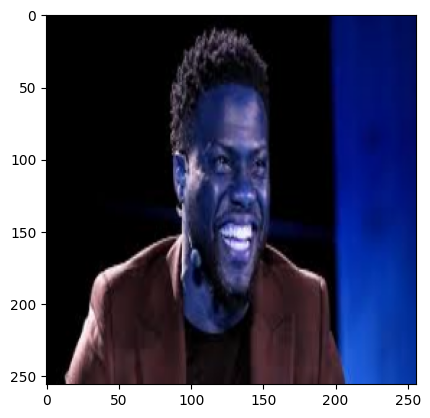

In [159]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show

In [160]:
resize.shape

TensorShape([256, 256, 3])

In [161]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [162]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


In [163]:
yhat

array([[0.96050423]], dtype=float32)